# Uso de UrbanPy

UrbanPy es un proyecto open source para automatizar la extracción, medición y visualización de métricas de accesibilidad urbana. La librería se basa en información abierta a partir del proyecto de [OpenStreetMap](https://www.openstreetmap.org/). OpenStreetMap (OSM) es un servicio de mapas online que publica información contribuida en forma libre por más de un millón de voluntarios, que benefician a los 5,5 millones de usuarios de la plataforma.

Los contribuidores más entusiastas mapean barrios completos utilizando herramientas GPS para enviar información local completa, actualizada y precisa a OpenStreetMap. Varias empresas y entidades públicas que producen información geográfica también contribuyen al permitir que sus datos sean incluidos. Existen equipos profesionales de contribuidores que que se coordinan para agregar y mantener actualizada información georeferenciada de límites políticos, calles, edificios, negocios y otros puntos de interés; en ocasiones empleados por compañías que dependen de OpenStreetMap para el “mapa base” de sus productos, como mapbox.com y carto.com.

Toda la información disponible en OpenStreetMap puede ser descargada y reutilizada por cualquier persona, ya sea accediendo al mapa online, obteniendo una copia completa de la base de datos, o accediendo a los datos vía API.

UrbanPy puede instalarse mediante *pip*, el "administrador de paquetes" de Python.

In [1]:
pip install urbanpy

     |████████████████████████████████| 95 kB 4.0 MB/s 
     |████████████████████████████████| 994 kB 42.4 MB/s 
     |████████████████████████████████| 1.0 MB 43.0 MB/s 
     |████████████████████████████████| 793 kB 41.6 MB/s 
     |████████████████████████████████| 6.3 MB 37.3 MB/s 
     |████████████████████████████████| 16.7 MB 395 kB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 11.2 MB 42.9 MB/s 
     |████████████████████████████████| 899 kB 40.9 MB/s 
  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=6260a651f6c76a80c64f9b272419864fa3bd2941f913a75a9a0dc4e9d3eaf18d
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall:

Una vez instalada la librería UrbanPy, es necesario reiniciar la máquina virtual para efectivizar la instalación en Google Colab. 

Para eso podemos cliquear el botón "RESTART RUNTIME" que aparece al final de la salida de la celda anterior, que luce así:


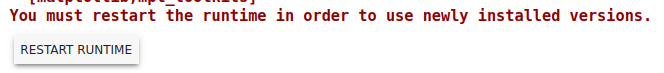

Una vez que UrbanPy se encuentra instalado y listo para usar, activamos las librerías de funciones que vamos a utilizar con el comando `import`:



In [ ]:
import sys
sys.path.append('..')
import urbanpy as up
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import plotly.express as px # para grafico
from tqdm import notebook

notebook.tqdm().pandas() # esto es para la funcion de osrm route que no pude usar


0it [00:00, ?it/s]

## Descarga de datos urbanos

Para descargar información, primero es necesario definir el lugar que queremos analizar. En este ejemplo, vamos a utilizar la ciudad de Buenos Aires, en Argentina. 

In [ ]:
ba = up.download.nominatim_osm('Ciudad de Buenos Aires, Argentina')

La funcion *download.nominatim_osm* nos permite obtener los límites de la ciudad. Utilizamos la función *polt* para visualizar nuestra descarga. 

<AxesSubplot:>

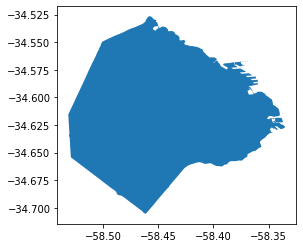

In [ ]:
ba.plot()

Para aplicar algoritmos y visualizar datos espaciales variados definimos una unidad espacial uniforme. UrbanPy permite aprovechar fácilmente todo el poder del paquete [Uber H3](https://eng.uber.com/h3/) para dividir la ciudad en hexágonos uniformes.

In [ ]:
hex_ba = up.geom.gen_hexagons(resolution= 9, city=ba)

/usr/local/lib/python3.7/dist-packages/urbanpy/geom/geom.py:168: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  city_poly = city.explode().reset_index(drop=True)


La variable *city* requiere un objeto espacial, en este caso la geometría de la ciudad de Buenos Aires. 
La variable *resolution* permite ajustar el tamaño de las celdas hexagonales: mayor resolución implica una división del territorio en más celdas. 

<AxesSubplot:>

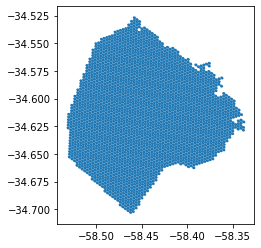

In [ ]:
hex_ba.plot()

Podemos utilizar la función *head* para ver los primeros registros. 

In [ ]:
hex_ba.head()

,hex,geometry
0,89c2e31155bffff,"POLYGON ((-58.38731 -34.63601, -58.38628 -34.6..."
1,89c2e3116abffff,"POLYGON ((-58.36417 -34.63952, -58.36314 -34.6..."
2,89c2e311167ffff,"POLYGON ((-58.39747 -34.60960, -58.39643 -34.6..."
3,89c2e312b7bffff,"POLYGON ((-58.49350 -34.60619, -58.49246 -34.6..."
4,89c2e311a6fffff,"POLYGON ((-58.39252 -34.57427, -58.39148 -34.5..."


La función *shape* nos permite ver el tamaño del dataset. 

In [ ]:
hex_ba.shape

(2812, 2)

En este caso, la ciudad de Buenos Aires se dividió en 2812 celdas. 

## Descarga de datos de población

La información de datos de población se descarga a nivel país con la función *hdx_fb_population* disponible en la librería UrbanPy.
En esta función se define en primer lugar el país, y luego el tipo de población: *full* (refiere a toda la población), *children* (refiere a niños y niñas), *youth* (refiere a jóvenes) y *elderly* (refiere a la población adulta). 
La función accede a los [estimados demográficos de alta resolución que ha creado Facebook](https://dataforgood.facebook.com/dfg/docs/high-resolution-population-density-maps-demographic-estimates-documentation), con datos precisos sobre la densidad de población en cualquier parte del mundo. 

In [ ]:
pop_arg = up.download.hdx_fb_population('argentina', 'full')

Si por alguna razón la función `hdx_facebook_population()` no encuentra datos del país y tipo deseados, se puede realizar una búsqueda manual en el [repositorio online](https://data.humdata.org/organization/facebook) de los datos, y copiar el identificador de dataset.

Por ejemplo, para la población general de Ecuador, encontramos

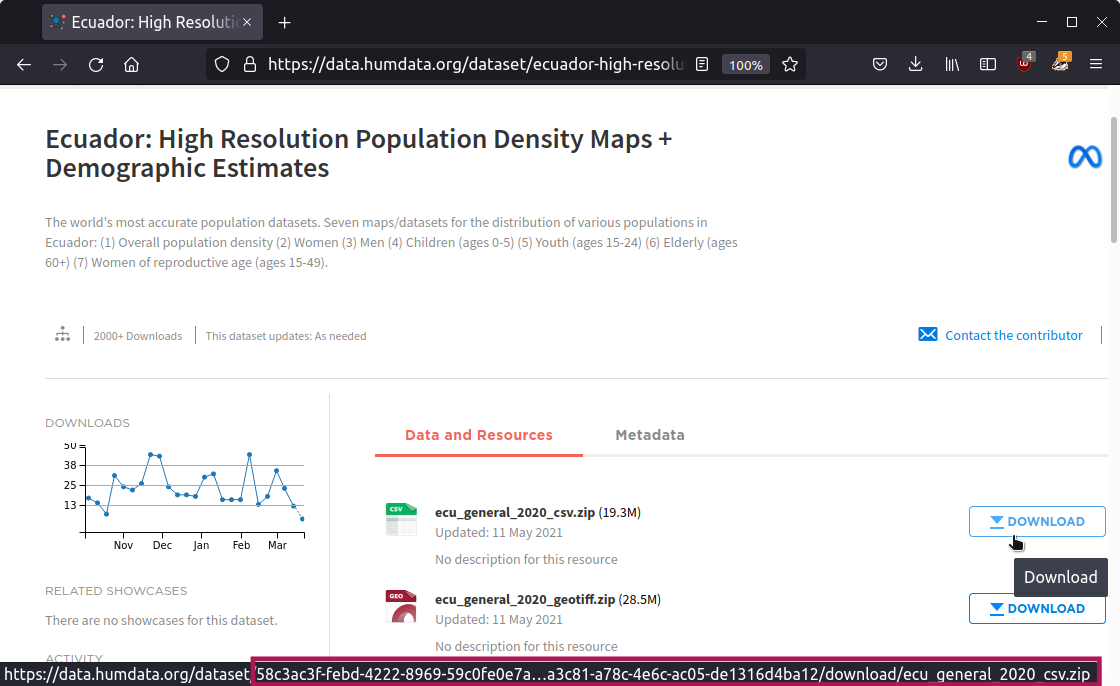

Ya provistos del identificador podemos realizar la descarga vía UrbanPy, así:

In [ ]:
pop_ecu = up.download.hdx_dataset('58c3ac3f-febd-4222-8969-59c0fe0e7a0d/resource/c05a3c81-a78c-4e6c-ac05-de1316d4ba12/download/ecu_general_2020_csv.zip')

Una vez que tenemos los datos de población, utilizamos la función head para ver los primeros registros.

In [ ]:
pop_arg.head()

,longitude,latitude,ecu_general_2020
0,-78.189722,2.0,25.356691
1,-78.187500,2.0,25.356691
2,-77.561667,2.0,12.131086
3,-77.560556,2.0,12.131086
4,-77.282500,2.0,7.821429


Como podemos observar, contamos con la población de 2015, 2020 y la latitud/longitud. Los datos corresponden a toda la Argentina. Vamos primero a filtrar por la zona de interés.

In [ ]:
pop_ba = up.geom.filter_population(pop_arg, ba)

Al aplicar la función *filter_population*, filtramos la población dentro del bounding box que contiene a nuestra ciudad. 
El bounding box (o caja de coordenadas) refiere a las coordenadas de un rectángulo que abarque la zona de interés, es decir los valores máximos y mínimos de latitud y longitud.

<AxesSubplot:>

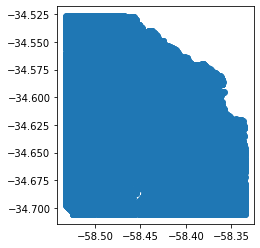

In [ ]:
pop_ba.plot()

Efectivamente, los datos se extienden por fuera del límite de nuestra ciudad. 

Ahora que tenemos los puntos de población, y los hexágonos, vamos a calcular la población por hexagono. Para eso, se utiliza la función *merge_shape_hex*

In [ ]:
hex_ba = up.geom.merge_shape_hex(hex_ba, pop_ba, agg={'population_2020':'sum'})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

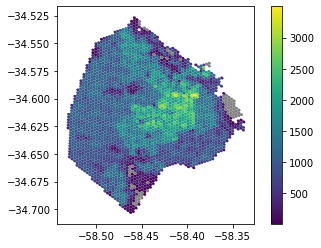

In [ ]:

hex_ba.plot('population_2020', legend=True, missing_kwds={'color':'grey'})


Vamos a armar un mapa interactivo para visualizar la información. Para eso, podemos utilizar la función *choropleth_map*. Esta función se basa en *choropleth_mapbox* de la librería *plotly*. [Aquí](https://plotly.com/python/mapbox-county-choropleth/) se pueden ver más parámetros para configurar. 

In [ ]:
fig = up.plotting.choropleth_map(hex_ba, 'population_2020', title='Población estimada - 2020', 
                                 zoom = 10, color_continuous_scale="Viridis",
                                 opacity=0.8,
                                 labels={'population_2020':'Población 2020'}
                                 
                                 )

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
)

fig.show()

In [ ]:
help(up.plotting.choropleth_map)

Help on function choropleth_map in module urbanpy.plotting.plotting:

choropleth_map(gdf, color_column, df_filter=None, **kwargs)
    Produce a Choroplethmap using plotly by passing a GeoDataFrame.
    
    Parameters
    ----------
    
    gdf: GeoDataFrame
             Input data containing a geometry column and features
    
    color_column: str
                      Column from gdf to use as color
    
    
    df_filter: pd.Series, default to None
                   Pandas Series containing true/false values that satisfy a
                   condition (e.g. (df['population'] > 100))
    
    **kargs: Any parameter of plotly.px.choroplethmapbox.
    
    Examples
    --------
    
    >>> hex_lima = urbanpy.geom.gen_hexagons(8, lima)
    >>> hex_lima['pop_2020'] = population_2020
    >>> urbanpy.plotting.choropleth_map(hex_lima, 'pop_2020', [-12, -77])



## Accesibilidad urbana


Para evaluar accesibilidad urbana, es necesario primero definir accesibilidad a que lugar(es) de interés, para luego obtener los datos de esos puntos de interés.  
Para obtener datos georeferenciados de puntos de interés realizaremos consultas a [Overpass](https://overpass-api.de/), una interfaz que permite extraer información de la base de datos global de OpenStreetMap. En [este wiki](https://https://wiki.openstreetmap.org/wiki/Map_features) se pueden consultar los datos disponibles en OSM.

Overpass requiere que se especifique un *bounding box*. Para obtenerlo, se puede usar la propiedad *total_bounds*, que devuelve un array con los valores.

In [ ]:
ba.total_bounds

array([-58.5314494, -34.705637 , -58.3351423, -34.5265535])

En este ejemplo, nos interesa evaluar la accesibilidad a establecimientos de venta de comidas (como supermercados, minimercados, quioscos, almancenes, entre otros). Estos tipos de comercios son de primera necesidad y son necesarios para la Ciudad de 15min. Además, durante la primer ola de Covid-19 se vió la importancia de contar con estos establecimientos de forma cercana. 

In [ ]:
ec = up.download.overpass_pois(bounds=ba.total_bounds, facilities='food')

Nuevamente, utilizamos la función *head* para ver los primeros resultados. 

In [ ]:
ec.head()

,type,id,lat,lon,tags,geometry,poi_type
0,node,331523512,-34.638106,-58.502941,"{'brand': 'Coto', 'brand:wikidata': 'Q5175411'...",POINT (-58.50294 -34.63811),supermarket
1,node,455754664,-34.586167,-58.422577,"{'name': 'Disco', 'shop': 'supermarket'}",POINT (-58.42258 -34.58617),supermarket
2,node,455755305,-34.586042,-58.425876,"{'name': 'Antonito', 'shop': 'convenience'}",POINT (-58.42588 -34.58604),convenience
3,node,456042052,-34.616046,-58.447561,"{'name': 'Supermercado Bambi', 'operator': 'Ba...",POINT (-58.44756 -34.61605),supermarket
4,node,479750724,-34.609435,-58.359050,"{'name': 'La Nona', 'shop': 'kiosk', 'source':...",POINT (-58.35905 -34.60943),kiosk


Veamos los geometrías en un mapa. 

<AxesSubplot:>

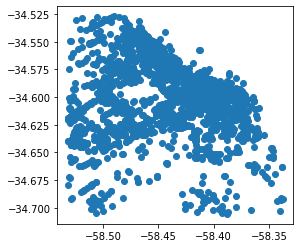

In [ ]:
ec.plot()

Vamos a evaluar disponibilidad de comercios per capita dentro de nuestros polígonos hexagonales. Para eso, vamos a calcular la cantidad de comercios en cada hexagono. 
Incorporamos la variable *cant* para indicar la cantidad de comercios.

In [ ]:
ec['cant'] = 1

Calculamos la cantidad de comercios por hexágono

In [ ]:
hex_ba = up.geom.merge_shape_hex(hex_ba, ec, agg={'cant':'sum'})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/urbanpy/geom/geom.py:234: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(shape, hexs, how=how, op=op)


Graficamos

<AxesSubplot:>

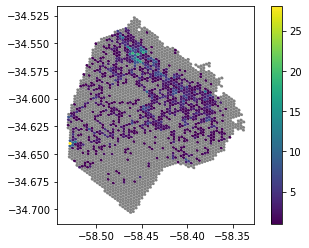

In [ ]:
hex_ba.plot('cant', legend=True, missing_kwds={'color':'grey'})


Remplazamos los valores nulos por 0: en esa celda no se encontraron comercios. 

In [ ]:
hex_ba['cant'] = hex_ba['cant'].fillna(0)

Vamos a generar un indicador de ratio de establecimientos de venta de comida per capita cada 1000 habitantes (considerando la población de 2020)

In [ ]:
hex_ba['r_ecpc'] = round(hex_ba['cant'] *1000 / hex_ba['population_2020'], 4)

In [ ]:
hex_ba.head()

,hex,geometry,population_2020,population_2015,cant,r_ecpc
0,89c2e31155bffff,"POLYGON ((-58.38731 -34.63601, -58.38628 -34.6...",917.343697,16.550618,1.0,0.1090
1,89c2e3116abffff,"POLYGON ((-58.36417 -34.63952, -58.36314 -34.6...",633.410736,15.713403,1.0,0.1579
2,89c2e311167ffff,"POLYGON ((-58.39747 -34.60960, -58.39643 -34.6...",2145.756064,36.711082,0.0,0.0000
3,89c2e312b7bffff,"POLYGON ((-58.49350 -34.60619, -58.49246 -34.6...",802.802475,19.429860,3.0,0.3737
4,89c2e311a6fffff,"POLYGON ((-58.39252 -34.57427, -58.39148 -34.5...",2262.830672,46.779507,0.0,0.0000


Graficamos

<AxesSubplot:>

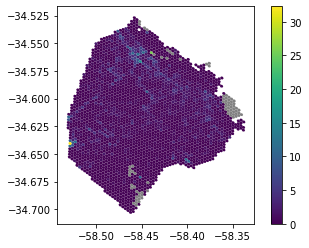

In [ ]:
hex_ba.plot('r_ecpc', legend=True, missing_kwds={'color':'grey'})

Mapa interactivo

In [ ]:
fig = up.plotting.choropleth_map(hex_ba, 'r_ecpc', title='Ratio de comercios', 
                                 zoom = 10, color_continuous_scale="Viridis",
                                 opacity=0.8,
                                 labels={'r_ecpc':'Comercios c/1000hab'}
                                 
                                 )

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
)

fig.show()

Ahora, calcularemos la distancia a los comercios de alimentos más cercanos al centroinde de los hexagonos. 
Primero, vamos a calcular los centroides. 

In [ ]:
hex_ba['lat'] = hex_ba.geometry.centroid.y
hex_ba['lon'] = hex_ba.geometry.centroid.x

Dentro de la librería *UrbanPy*, podemos utilizar la función *nn_search* para localizar los vecinos más cercanos (nearest neighboor).  

In [ ]:
dist_up, ind_up = up.utils.nn_search(
    tree_features=ec[['lat', 'lon']].values, # Puntos de interes
    query_features=hex_ba[['lat', 'lon']].values, # Centroides de los hexagonos
    metric='haversine' # Metrica de distancia
)

Agregamos la variable 'ec_cercano' que indica el índice del establecimiento de comida más cercano.

In [ ]:
hex_ba['ec_cercano'] = ind_up
hex_ba.head()

In [ ]:
up.routing.start_osrm_server('peru', 'south-america', 'foot')

In [ ]:
distance_duration = hex_ba.progress_apply(
    lambda row: up.routing.osrm_route(
        origin=row.geometry.centroid, 
        destination = ec.iloc[row['ec_cercano']]['geometry']
    ),
    result_type='expand',
    axis=1,
)

## Descarga de datos urbanos VERSION MANTA

Para descargar información, primero es necesario definir el lugar que queremos analizar. En este ejemplo, vamos a utilizar la ciudad de Manta, Ecuador.

In [ ]:
manta = up.download.nominatim_osm('Manta, Ecuador')

In [ ]:
manta.plot()

In [ ]:
hex_manta = up.geom.gen_hexagons(resolution= 9, city=manta)

In [ ]:
hex_manta.plot()

In [ ]:
hex_manta.head()

In [ ]:
hex_manta.shape

## Descarga de datos de población

In [ ]:
pop_ecu = up.download.hdx_dataset('58c3ac3f-febd-4222-8969-59c0fe0e7a0d/resource/c05a3c81-a78c-4e6c-ac05-de1316d4ba12/download/ecu_general_2020_csv.zip')
#pop_ecu = up.download.hdx_fb_population('ecuador', 'full')

In [ ]:
pop_ecu.head()